In [12]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import pyspark.sql as sparksql
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=8,4

warnings.filterwarnings('ignore')
#from pyspark_dist_explore import pandas_histogram

# initialise sparkContext
spark = SparkSession.builder \
    .master('local') \
    .appName('isd_lite_data') \
    .config('spark.executor.memory', '5gb') \
    .config("spark.cores.max", "6") \
    .getOrCreate()

sc = spark.sparkContext

# using SQLContext to read parquet file
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

# to read parquet file
#df = sqlContext.read.parquet('C:\Scala_IDE_Eclipse\eclipse\Scala_projects\ATT_Interview_Project\ATT\parquet\isd_lite_data.parquet')
#df = pd.read_parquet('C:\\Scala_IDE_Eclipse\\eclipse\\Scala_projects\\ATT_Interview_Project\\ATT\\parquet\\isd_lite_data.parquet', engine='pyarrow')
df = sqlContext.read.parquet('C:\Scala_IDE_Eclipse\eclipse\Scala_projects\ISD_Data_Extract\ATT\parquet\isd_lite_data.parquet')
df.show()

+--------------------+-----+---+----+-----+-----+--------+----------+------+-------+-----------------+-----------------+----+
|            FileName|Month|Day|Hour|ATemp|DTemp|SeaPress|WDirection|WSpeed|SkyCond|LiquidPrecOneHour|LiquidPrecSixHour|Year|
+--------------------+-----+---+----+-----+-----+--------+----------+------+-------+-----------------+-----------------+----+
|file:/C:/Scala_ID...|   01| 01|  00|  -57|  -62|   10301|       180|    15|      9|            -9999|                0|2017|
|file:/C:/Scala_ID...|   01| 01|  01|  -59|  -64|   10293|       170|     5|      9|                0|            -9999|2017|
|file:/C:/Scala_ID...|   01| 01|  02|  -57|  -61|   10286|       190|    10|      9|                0|            -9999|2017|
|file:/C:/Scala_ID...|   01| 01|  03|  -54|  -58|   10282|       180|    10|      9|            -9999|            -9999|2017|
|file:/C:/Scala_ID...|   01| 01|  04|  -49|  -53|   10275|       230|    15|      9|                0|            -999

In [13]:
dfIsdData = df.toPandas()
dfIsdData.columns = ['Station_Code','Month','Day','Hour','Air_Temp' \
,'Dew_Point_Temp','Sea_Pressure', 'Wind_Direction', 'Wind_Speed', 'Sky_Condition' \
,'Liquid_Precipitation_One_Hour', 'Liquid_Precipitation_Six_Hour', 'Year']
dfIsdData['Station_Code']= dfIsdData['Station_Code'].str[-20:].str[:6] # - Station code extraction from file name
dfIsdData

,Station_Code,Month,Day,Hour,Air_Temp,Dew_Point_Temp,Sea_Pressure,Wind_Direction,Wind_Speed,Sky_Condition,Liquid_Precipitation_One_Hour,Liquid_Precipitation_Six_Hour,Year
0,071810,01,01,00,-57,-62,10301,180,15,9,-9999,0,2017
1,071810,01,01,01,-59,-64,10293,170,5,9,0,-9999,2017
2,071810,01,01,02,-57,-61,10286,190,10,9,0,-9999,2017
3,071810,01,01,03,-54,-58,10282,180,10,9,-9999,-9999,2017
4,071810,01,01,04,-49,-53,10275,230,15,9,0,-9999,2017
5,071810,01,01,05,-47,-51,10268,200,15,8,0,-9999,2017
6,071810,01,01,06,-47,-51,10265,210,15,8,-9999,-9999,2017
7,071810,01,01,07,-48,-52,10259,200,15,8,0,-9999,2017
8,071810,01,01,08,-52,-56,10256,190,15,6,0,-9999,2017
9,071810,01,01,09,-42,-45,10251,180,15,8,-9999,-9999,2017


In [14]:
# information on the columns
dfIsdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78231 entries, 0 to 78230
Data columns (total 13 columns):
Station_Code                     78231 non-null object
Month                            78231 non-null object
Day                              78231 non-null object
Hour                             78231 non-null object
Air_Temp                         78231 non-null object
Dew_Point_Temp                   78231 non-null object
Sea_Pressure                     78231 non-null object
Wind_Direction                   78231 non-null object
Wind_Speed                       78231 non-null object
Sky_Condition                    78231 non-null object
Liquid_Precipitation_One_Hour    78231 non-null object
Liquid_Precipitation_Six_Hour    78231 non-null object
Year                             78231 non-null int32
dtypes: int32(1), object(12)
memory usage: 7.5+ MB


In [15]:
# number of rows
len(dfIsdData)

78231

In [17]:
#Filter for year = 1935
dfIsdData[dfIsdData.Year == 2016]

,Station_Code,Month,Day,Hour,Air_Temp,Dew_Point_Temp,Sea_Pressure,Wind_Direction,Wind_Speed,Sky_Condition,Liquid_Precipitation_One_Hour,Liquid_Precipitation_Six_Hour,Year
34905,317350,01,01,00,-222,-248,10249,210,20,7,-9999,-9999,2016
34906,317350,01,01,01,-200,-230,-9999,170,20,-9999,-9999,-9999,2016
34907,317350,01,01,02,-180,-200,-9999,-9999,10,-9999,-9999,-9999,2016
34908,317350,01,01,03,-163,-187,10229,150,20,7,-9999,-9999,2016
34909,317350,01,01,04,-140,-180,-9999,150,20,-9999,-9999,-9999,2016
34910,317350,01,01,05,-140,-180,-9999,0,0,-9999,-9999,-9999,2016
34911,317350,01,01,06,-138,-179,10213,150,10,8,-9999,-9999,2016
34912,317350,01,01,07,-140,-180,-9999,-9999,-9999,-9999,-9999,-9999,2016
34913,317350,01,01,08,-140,-170,-9999,70,20,-9999,-9999,-9999,2016
34914,317350,01,01,09,-143,-173,10199,70,20,8,-9999,-9999,2016


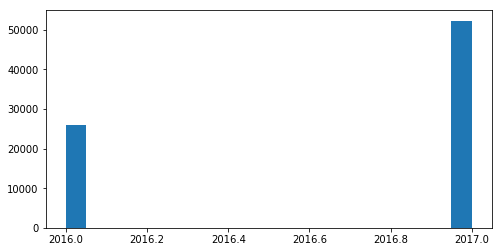

In [18]:
#Distribution
#vis1 = sns.distplot(pd.to_numeric(dfIsdData["Year"]))
vis1Plt = plt.hist(pd.to_numeric(dfIsdData["Year"]), bins=20)


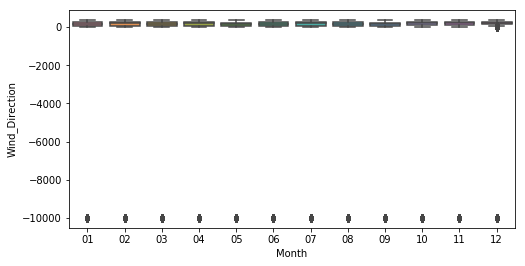

In [21]:
#BoxPlots
#dfIsdData.boxplot(column='Sky Condition',layout=(1,9), figsize=(20,10), whis=[5,95])
#dfIsdData["Month"] = pd.to_numeric(dfIsdData["Month"])
#dfIsdData["Year"] = pd.to_numeric(dfIsdData["Year"])
#dfIsdData["Hour"] = pd.to_numeric(dfIsdData["Hour"])
dfIsdData["Hour"] = pd.to_numeric(dfIsdData["Hour"])
dfIsdData["Wind_Direction"] = pd.to_numeric(dfIsdData["Wind_Direction"])
#dfIsdData[ (dfIsdData.Wind_Direction > 0) and (dfIsdData.Year == 1957) ]
dfIsdData[ (dfIsdData.Wind_Direction > 0)]
#dfIsdData = dfIsdData[dfIsdData.Month == 1]
dfIsdData.groupby(['Year'])['Month'].max()
vis2 = sns.boxplot(data=dfIsdData, x=dfIsdData["Month"], y=dfIsdData["Wind_Direction"])
#vis2.set(xlabel='Max Value Hourly basis', ylabel='Wind Direction')

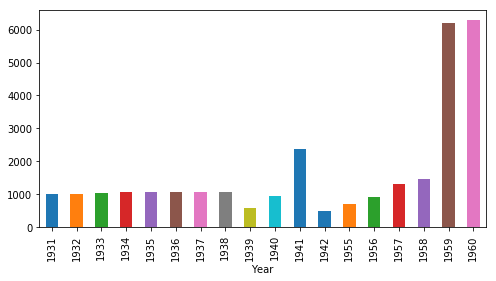

In [351]:
dfIsdData.groupby(['Year'])['Year'].count().plot(kind='bar')

(0, 381)

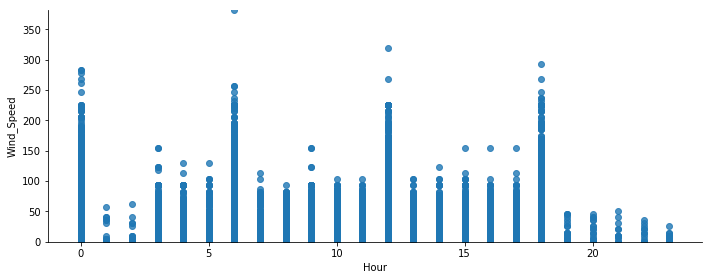

In [416]:
dfIsdData["Hour"] = pd.to_numeric(dfIsdData["Hour"])
dfIsdData["Year"] = pd.to_numeric(dfIsdData["Year"])
dfIsdData["Month"] = pd.to_numeric(dfIsdData["Month"])
dfIsdData["Day"] = pd.to_numeric(dfIsdData["Day"])
dfIsdData["Wind_Speed"] = pd.to_numeric(dfIsdData["Wind_Speed"])
dfIsdData = dfIsdData[dfIsdData.Wind_Speed != -9999]
#dfIsdData[ (dfIsdData.Wind_Direction > 0) and 
dfIsdData[(dfIsdData.Year == 1957) & (dfIsdData.Month == 1) & (dfIsdData.Day == 20)]
vis3 = sns.lmplot(data=dfIsdData,x='Hour',y='Wind_Speed', fit_reg=False, size = 4, aspect = 2.5)
vis3.axes[0,0].set_ylim(min(dfIsdData.Wind_Speed), max(dfIsdData.Wind_Speed))

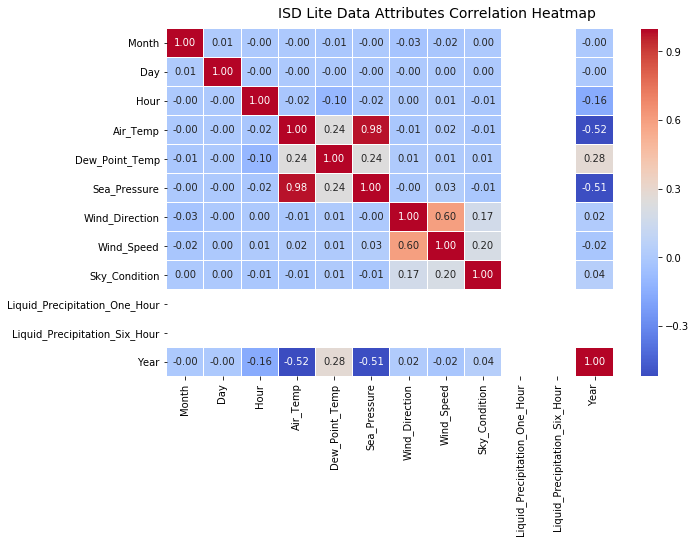

In [359]:
# Correlation Matrix Heatmap
dfIsdData["Year"] = pd.to_numeric(dfIsdData["Year"])
dfIsdData["Month"] = pd.to_numeric(dfIsdData["Month"])
dfIsdData["Day"] = pd.to_numeric(dfIsdData["Day"])
dfIsdData["Hour"] = pd.to_numeric(dfIsdData["Hour"])
dfIsdData["Air_Temp"] = pd.to_numeric(dfIsdData["Air_Temp"])
dfIsdData["Dew_Point_Temp"] = pd.to_numeric(dfIsdData["Dew_Point_Temp"])
dfIsdData["Sea_Pressure"] = pd.to_numeric(dfIsdData["Sea_Pressure"])
dfIsdData["Wind_Direction"] = pd.to_numeric(dfIsdData["Wind_Direction"])
dfIsdData["Wind_Speed"] = pd.to_numeric(dfIsdData["Wind_Speed"])
dfIsdData["Sky_Condition"] = pd.to_numeric(dfIsdData["Sky_Condition"])
dfIsdData["Liquid_Precipitation_One_Hour"] = pd.to_numeric(dfIsdData["Liquid_Precipitation_One_Hour"])
dfIsdData["Liquid_Precipitation_Six_Hour"] = pd.to_numeric(dfIsdData["Liquid_Precipitation_Six_Hour"])
f, ax = plt.subplots(figsize=(10, 6))
corr = dfIsdData.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('ISD Lite Data Attributes Correlation Heatmap', fontsize=14)

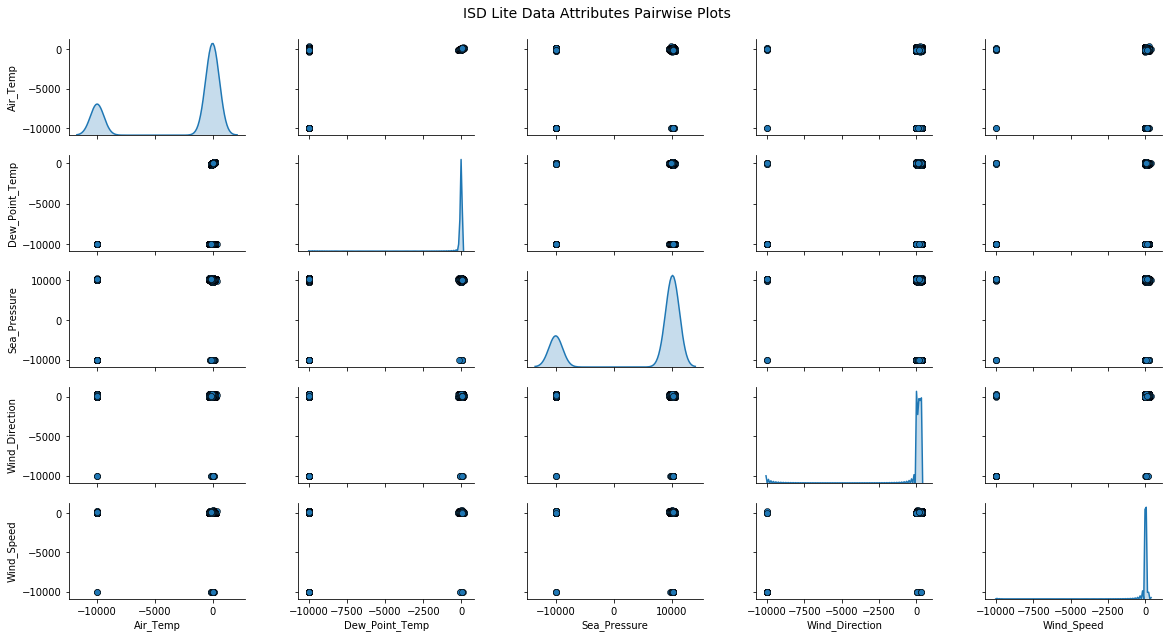

In [368]:
# Pair-wise Scatter Plots
cols = ['Air_Temp' \
,'Dew_Point_Temp','Sea_Pressure', 'Wind_Direction', 'Wind_Speed'] #'Sky_Condition' \
#,'Liquid_Precipitation_One_Hour', 'Liquid_Precipitation_Six_Hour']
pp = sns.pairplot(dfIsdData[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('ISD Lite Data Attributes Pairwise Plots', fontsize=14)

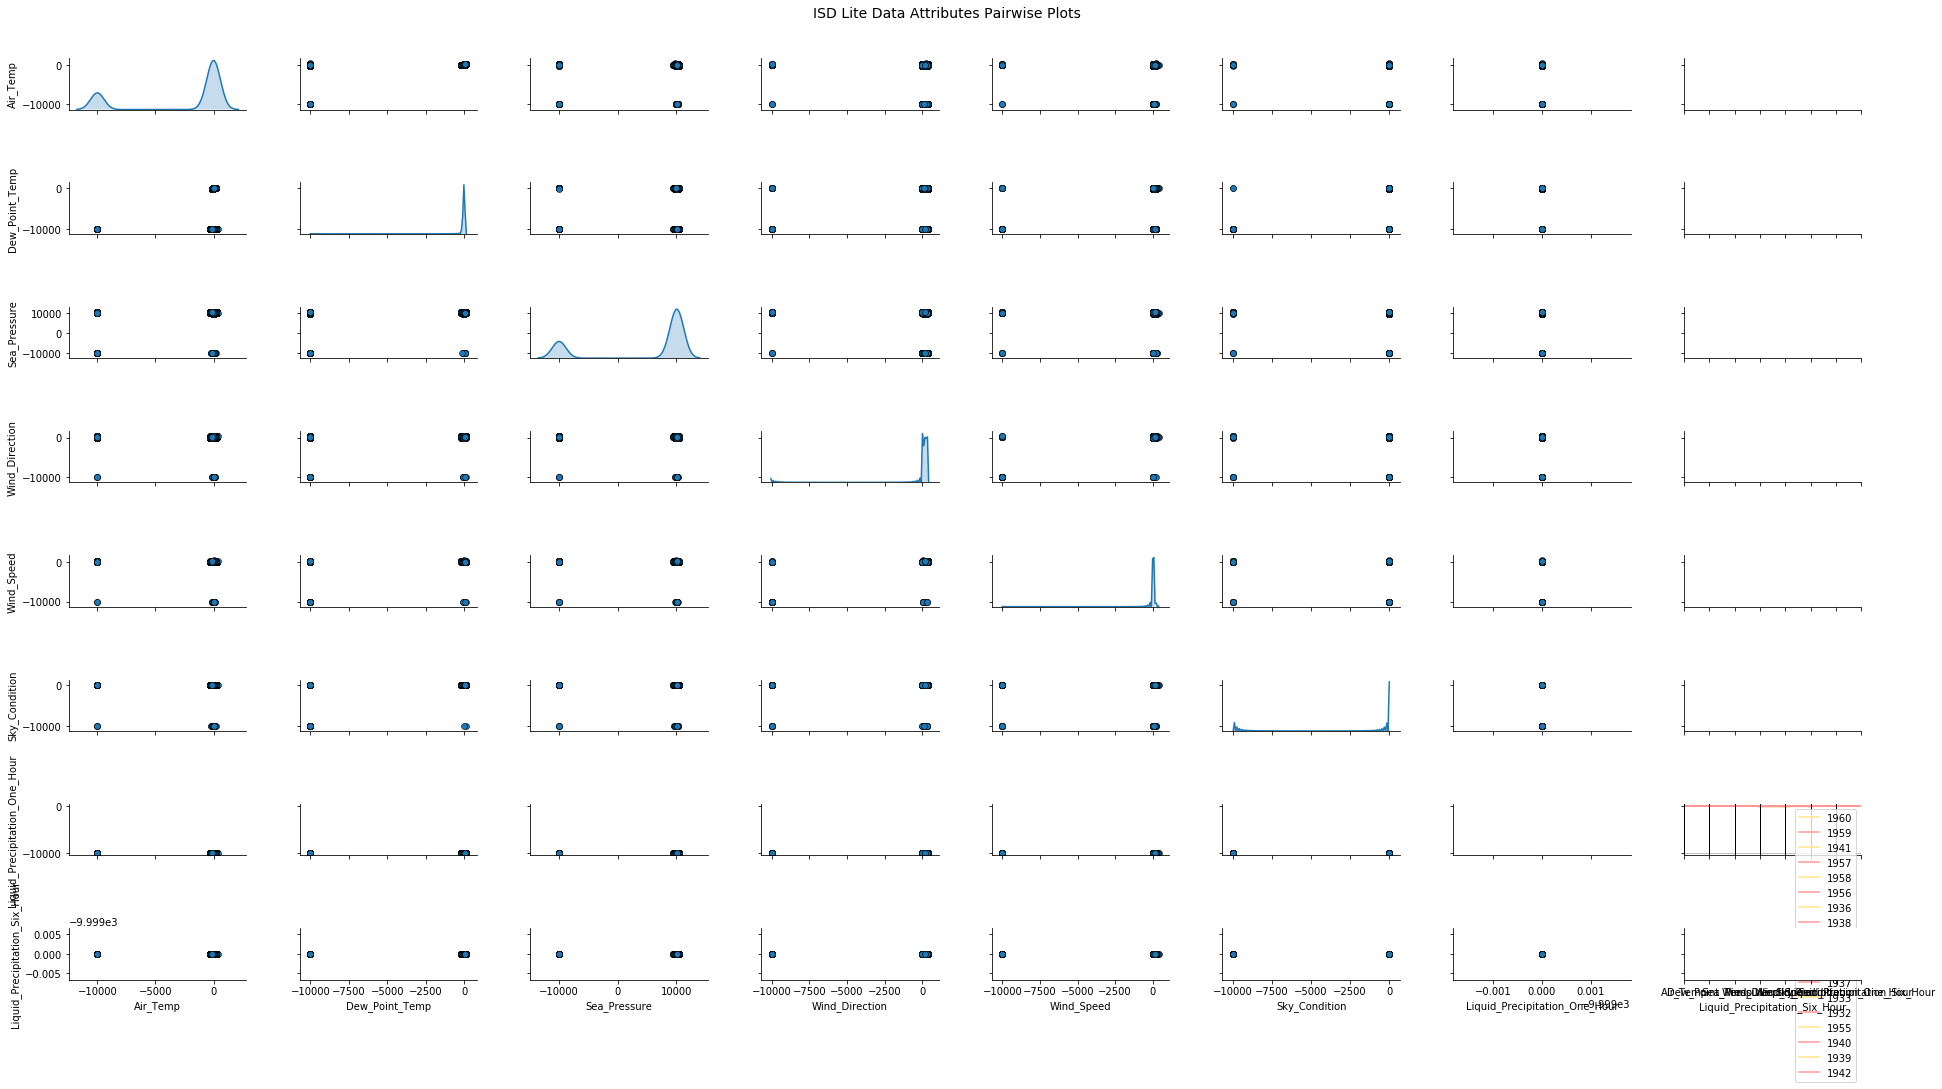

In [370]:
# Scaling attribute values to avoid few outiers
cols = ['Air_Temp' \
,'Dew_Point_Temp','Sea_Pressure', 'Wind_Direction', 'Wind_Speed', 'Sky_Condition' \
,'Liquid_Precipitation_One_Hour', 'Liquid_Precipitation_Six_Hour']
pp = sns.pairplot(dfIsdData[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('ISD Lite Data Attributes Pairwise Plots', fontsize=14)
subset_df = dfIsdData[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, dfIsdData['Year']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'Year', color=('#FFE888', '#FF9999'))

Text(0, 0.5, 'Air_Temp')

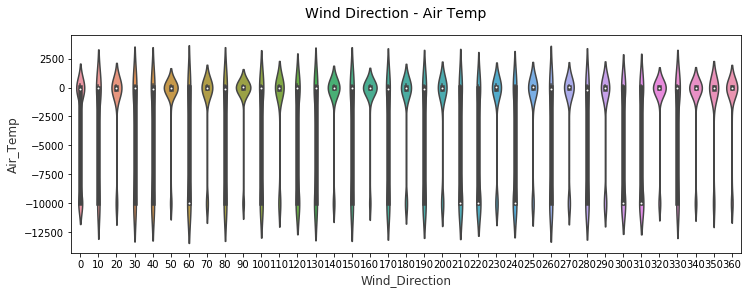

In [402]:
# Violin Plots
dfIsdData = dfIsdData[dfIsdData.Wind_Direction != -9999]
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wind Direction - Air Temp', fontsize=14)

sns.violinplot(x="Wind_Direction", y="Air_Temp", data=dfIsdData,  ax=ax)
ax.set_xlabel("Wind_Direction",size = 12,alpha=0.8)
ax.set_ylabel("Air_Temp",size = 12,alpha=0.8)

In [401]:
# Visualizing 3-D mix data using kernel density plots
#dfIsdData = dfIsdData[dfIsdData.Wind_Direction != -9999]
#ax = sns.kdeplot(dfIsdData['Air_Temp'], dfIsdData['Dew_Point_Temp'],
#                 cmap="YlOrBr", shade=True, shade_lowest=False)
#ax = sns.kdeplot(dfIsdData['Air_Temp'], dfIsdData['Wind_Direction'],
#                  cmap="Reds", shade=True, shade_lowest=False)
#ax = sns.kdeplot(dfIsdData['Air_Temp'], dfIsdData['Sky_Condition'],
#                  cmap="Reds", shade=True, shade_lowest=False)

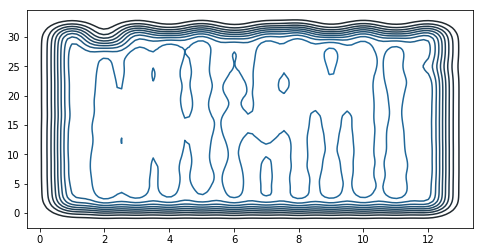

In [392]:
sns.kdeplot(dfIsdData);

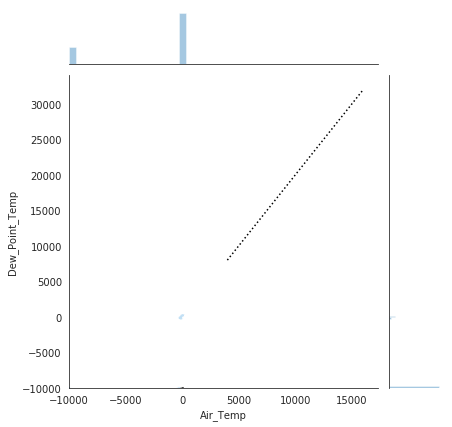

In [396]:
with sns.axes_style('white'):
    g = sns.jointplot("Air_Temp", "Dew_Point_Temp", dfIsdData, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')